<a href="https://colab.research.google.com/github/Uros-Males/Minimization_Problem_On_Identical_Machines_Analysis/blob/main/Neural_Network_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#IN PROGRESS....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import time

df = pd.read_csv('/content/sample_data/C-instances-runtime-analysis.csv')
print(df.shape[0])

shuffled = df.sample(frac=1).reset_index()

columns_dont_want = ['y', 'index', 'inst.name', 'CPLEXStatus','type']
select = [x for x in shuffled.columns if x not in columns_dont_want]

X = shuffled.loc[:, select]

y = shuffled.loc[:,'y']

8750


In [2]:
X_modified = X.drop(['max', 'n/m', '(n/m)^2', '(n/m)^3', 'm/n', '(m/n)^2', '(m/n)^3', 'class', 'av.length'], axis = 1)

In [3]:
from keras.models import Sequential
from keras.layers import Dense ,Dropout,BatchNormalization
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score

from keras.layers import Activation
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects

import tensorflow
from tensorflow import keras 


def custom_activation(x):
    return 99999*1/(1+K.exp(-x))

get_custom_objects().update({'custom_activation': Activation(custom_activation)})

def make_model():
    model = Sequential()
    
    model.add(Dense(8, input_dim=X_modified.shape[1], activation='relu'))
    #model.add(Dropout(0.25))
    
    
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.25))

    model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.15))
    
    model.add(Dense(4, activation='relu'))
    
    model.add(Dense(1, activation = custom_activation))
    #model.add(Activation(custom_activation, name='SpecialActivation'))
    model.compile(loss='mean_squared_error', optimizer=tensorflow.keras.optimizers.Adam(clipnorm=1))
    return model

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_modified, y, random_state=0, train_size = 0.83)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

estimator = KerasRegressor(build_fn=make_model, epochs=120, batch_size=32, verbose=1)

history=estimator.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  if __name__ == '__main__':


Epoch 1/120
227/227 [==============================] - 3s 4ms/step - loss: 1719809792.0000
Epoch 2/120
227/227 [==============================] - 1s 4ms/step - loss: 1076197376.0000
Epoch 3/120
227/227 [==============================] - 1s 3ms/step - loss: 786915328.0000
Epoch 4/120
227/227 [==============================] - 1s 4ms/step - loss: 552979840.0000
Epoch 5/120
227/227 [==============================] - 1s 4ms/step - loss: 456276032.0000
Epoch 6/120
227/227 [==============================] - 1s 5ms/step - loss: 400863296.0000
Epoch 7/120
227/227 [==============================] - 1s 4ms/step - loss: 373095136.0000
Epoch 8/120
227/227 [==============================] - 1s 3ms/step - loss: 349290592.0000
Epoch 9/120
227/227 [==============================] - 1s 3ms/step - loss: 334804608.0000
Epoch 10/120
227/227 [==============================] - 1s 4ms/step - loss: 313661280.0000
Epoch 11/120
227/227 [==============================] - 1s 4ms/step - loss: 308271232.0000
Epoch 

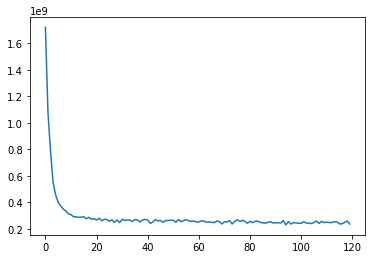

In [5]:
plt.plot(history.history['loss'])

In [6]:
from sklearn.metrics import r2_score
prediction = estimator.predict(X_test)
print("r_square score: ", r2_score(y_test,prediction))
yy = np.array(y_test)
predd = np.array(prediction)
for i in range(10):
  print("real value of y_test: " + str(yy[i]) + " -> the predict: " + str(predd[i]))

47/47 [==============================] - 0s 1ms/step
r_square score:  0.8008583738917185
real value of y_test: 99999.0 -> the predict: 99997.98
real value of y_test: 538.735535 -> the predict: 21.59732
real value of y_test: 149.027771 -> the predict: 0.04074392
real value of y_test: 0.124268 -> the predict: 0.0015448167
real value of y_test: 68.455162 -> the predict: 2.2587808e-05
real value of y_test: 5.332703 -> the predict: 0.00010288141
real value of y_test: 63.964359 -> the predict: 2.7363224
real value of y_test: 39.74852 -> the predict: 8.103447e-08
real value of y_test: 383.665741 -> the predict: 1544.2202
real value of y_test: 82.176697 -> the predict: 1.3212054


In [7]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print("RMSE:")
sqrt(mean_squared_error(yy, predd)) 

RMSE:


16375.338630446882